# ¿Cuál es la mejor tarifa?

Analisis para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Se debe realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Cargar todas las librerías
import math 


## Cargar datos

In [ ]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')# Carga los archivos de datos en diferentes DataFrames



## Preparar los datos

## Tarifas

In [81]:
plans.head() # Imprime una muestra de los datos para las tarifas



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Después de revisar el DataFrame **plans**, observo que contiene todos los datos relevantes sobre las tarifas: nombre del plan, cuota mensual, minutos, mensajes y megabytes incluidos, así como los costos adicionales por minuto, SMS y gigabyte excedido.

No detecto valores nulos en la información general (*plans.info()*), lo cual es positivo porque no se requerirá imputación de datos faltantes. También noto que los tipos de datos están correctos (números enteros o flotantes según corresponde).

La muestra de datos (*plans.head()*) confirma que existen dos planes: "surf" y "ultimate". Todo parece coherente con la descripción de tarifas proporcionada en la documentación del proyecto.

Por lo tanto, no es necesario realizar cambios adicionales en este DataFrame.

## Corregir datos

Hasta este punto, revisé los datos de las tarifas y no encontré problemas obvios con los tipos de datos ni valores extremos fuera de lugar. Por lo tanto, no realicé cambios en esta etapa.

## Enriquecer los datos

### 1.6 Enriquecer los datos

Decidí no enriquecer los datos de las tarifas porque toda la información necesaria ya se encuentra en el DataFrame. Más adelante, si es necesario, agregaré columnas durante los cálculos de ingresos mensuales.

Es importante mencionar que durante el análisis se deberá considerar la transformación de unidades en ciertas métricas. Por ejemplo, para algunas visualizaciones o cálculos específicos puede ser necesario convertir el tráfico de datos de **megabytes (MB)** a **gigabytes (GB)**, dividiendo entre 1024 o 1000 según el contexto del análisis. Esta consideración permite una interpretación más intuitiva de los datos relacionados con el consumo de internet.

## Usuarios/as

In [82]:
users.info() # Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [83]:
users.sample(10) # Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
212,1212,Alfredo,Pruitt,36,"Austin-Round Rock-Georgetown, TX MSA",2018-07-27,surf,NaN
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
179,1179,Darcey,Baird,22,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaN
428,1428,Asuncion,Conrad,66,"Phoenix-Mesa-Chandler, AZ MSA",2018-10-23,surf,NaN
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
42,1042,Clementina,Mclaughlin,40,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-01-15,surf,NaN
145,1145,Venice,Brooks,29,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-12,surf,NaN
480,1480,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,surf,NaN
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,NaN


Al revisar el DataFrame de usuarios, observé que:
	• Los tipos de datos son correctos en su mayoría.
	• Las columnas de fecha (reg_date y churn_date) necesitan ser convertidas a tipo datetime para análisis posterior.
	• No se detectaron valores nulos en user_id ni en plan.
Convertiré las fechas en la próxima etapa para enriquecer los datos.

### Corregir los datos

Convertí las columnas reg_date y churn_date a tipo datetime para poder trabajar con fechas más adelante (por ejemplo, calcular la duración de suscripción si es necesario). No se detectaron valores atípicos ni nulos importantes.

In [84]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### Enriquecer los datos

## Llamadas

In [85]:
calls.info() # Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [86]:
calls.sample(10) # Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
24257,1091_25,1091,2018-11-20,0.00
105586,1373_66,1373,2018-12-30,13.27
127572,1456_539,1456,2018-10-21,6.44
6184,1029_348,1029,2018-10-29,12.20
75577,1268_81,1268,2018-09-02,5.26
120818,1422_7,1422,2018-11-10,8.44
103019,1365_215,1365,2018-12-24,7.31
38968,1145_215,1145,2018-12-24,7.49
94787,1336_705,1336,2018-04-30,3.41
82037,1295_536,1295,2018-10-20,0.82


Observé que:
	• La columna call_date debe convertirse a tipo datetime.
	• La duración de las llamadas parece razonable. Sin embargo, algunas llamadas tienen una duración de 0 minutos. Esto puede deberse a llamadas no contestadas, por lo que no las eliminaré todavía.
	• No hay valores nulos.

### Corregir los datos

Convertí la columna call_date a tipo datetime. No eliminé las llamadas con duración 0 porque podrían representar intentos de llamada no contestados y eso puede ser relevante para el comportamiento de los usuarios.

In [87]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

Hasta el momento, las llamadas con duración de 0 segundos podrían interpretarse como intentos de llamada que no fueron contestados o llamadas fallidas. 
No las eliminé porque podrían aportar información importante sobre el comportamiento de los usuarios, como intentos de comunicación fallidos o posibles patrones en el uso del servicio. 
Más adelante, si el análisis muestra que estas llamadas afectan negativamente los cálculos relevantes, consideraré tratarlas de manera distinta o excluirlas.

## Mensajes

In [88]:
messages.info() # Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [89]:
messages.sample(10) # Imprime una muestra de datos para los mensajes



,id,user_id,message_date
46408,1316_267,1316,2018-11-12
39434,1256_232,1256,2018-12-20
29347,1180_328,1180,2018-12-23
21281,1132_557,1132,2018-11-23
21831,1132_1333,1132,2018-12-08
11868,1079_267,1079,2018-12-03
74938,1489_13,1489,2018-12-19
20100,1128_69,1128,2018-12-01
52304,1336_271,1336,2018-09-07
9981,1075_236,1075,2018-12-14


Observé que:
	• La columna message_date debe convertirse a tipo datetime.
	• No se detectaron valores nulos o inconsistencias.

### Corregir los datos

Convertí la columna message_date a tipo datetime para facilitar los cálculos mensuales más adelante.

In [90]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

## Internet

In [91]:
internet.info() # Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [92]:
internet.sample(10) # Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
75084,1353_247,1353,2018-10-10,726.94
35560,1160_264,1160,2018-12-01,216.89
82167,1384_409,1384,2018-10-20,0.00
13687,1064_135,1064,2018-09-12,354.72
85548,1399_156,1399,2018-12-21,362.80
75454,1355_106,1355,2018-10-25,459.75
101454,1483_271,1483,2018-07-11,196.74
23077,1106_348,1106,2018-12-07,120.32
23825,1110_83,1110,2018-06-22,389.44
86183,1400_318,1400,2018-05-19,439.05


En el DataFrame internet veo que las columnas principales son id, mb_used, session_date y user_id. Las variables parecen estar en los tipos correctos excepto session_date, que está como objeto (string) y debería ser tipo fecha. No detecto valores nulos en la muestra, pero revisaré en el siguiente paso.

### Corregir los datos

In [93]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

- Nota: Más adelante, cuando calculemos el consumo de datos en gigabytes (GB) se realizará la transformación de megabytes a gigabytes dividiendo entre 1024.
- Además, se aplicará un redondeo hacia arriba (ceil) porque cualquier exceso
- por mínimo que sea, implica un costo adicional según la política de los planes.

In [94]:
internet['month'] = internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

Verifico que los datos de las tarifas corresponden a lo mencionado en la descripción del proyecto. Las columnas incluyen el costo mensual, minutos, SMS y datos incluidos, así como el costo por excedente. Todo parece correcto y listo para usar.

In [95]:
plans # Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

Para este análisis solo necesitaba el conteo de llamadas por usuario y mes.
Sin embargo, en futuras ocasiones puedo usar una tabla dinámica (`pivot_table`) que permite calcular simultáneamente la suma de duraciones y el conteo de llamadas.

In [96]:
calls['month'] = calls['call_date'].dt.month

pivot_calls = calls.pivot_table(
    index=['user_id', 'month'],
    values=['duration'],
    aggfunc=['sum','count']
).reset_index()

In [97]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index()
minutes_per_month.rename(columns={'duration':'minutes_per_month'},inplace=True)# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.



In [98]:
messages['month'] = messages['message_date'].dt.month

messages_per_month = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
messages_per_month.rename(columns={'id':'messages_per_month'}, inplace=True)# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



In [99]:
internet['month'] = internet['session_date'].dt.month

mb_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
mb_per_month.rename(columns={'mb_used':'mb_per_month'}, inplace=True)

In [100]:
pivot_calls.head()

,user_id,month,sum,count
,,,duration,duration
0,1000,12,116.83,16
1,1001,8,171.14,27
2,1001,9,297.69,49
3,1001,10,374.11,65
4,1001,11,404.59,64


In [101]:
pivot_calls.columns = ['user_id', 'month', 'total_duration', 'calls_per_month']

user_behavior = pivot_calls.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
user_behavior = user_behavior.merge(messages_per_month, on=['user_id', 'month'], how='outer')
user_behavior = user_behavior.merge(mb_per_month, on=['user_id', 'month'], how='outer')
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month


In [102]:
user_behavior = user_behavior.merge(users[['user_id', 'plan']], on='user_id', how='left')
user_behavior = user_behavior.merge(plans, how='left', left_on='plan', right_on='plan_name')

# Añade la información de la tarifa



In [103]:
user_behavior.head()

,user_id,month,total_duration,calls_per_month,minutes_per_month,messages_per_month,mb_per_month,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,116.83,16.0,116.83,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,171.14,27.0,171.14,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,297.69,49.0,297.69,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,374.11,65.0,374.11,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,404.59,64.0,404.59,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf


In [105]:
calls['month'] = calls['call_date'].dt.month
calls_per_month = calls.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
calls_per_month.rename(columns={'id': 'calls_per_month'}, inplace=True)


In [106]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_month.rename(columns={'duration': 'minutes_per_month'}, inplace=True)


In [107]:
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_per_month.rename(columns={'id': 'messages_per_month'}, inplace=True)


In [108]:
internet['month'] = internet['session_date'].dt.month
mb_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
mb_per_month.rename(columns={'mb_used': 'mb_per_month'}, inplace=True)


In [109]:
user_behavior = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
user_behavior = user_behavior.merge(messages_per_month, on=['user_id', 'month'], how='outer')
user_behavior = user_behavior.merge(mb_per_month, on=['user_id', 'month'], how='outer')

In [110]:
user_behavior = user_behavior.merge(users[['user_id', 'plan']], on='user_id', how='left')
user_behavior = user_behavior.merge(plans, how='left', left_on='plan', right_on='plan_name')

In [111]:
user_behavior = user_behavior.fillna(0)


In [112]:
import numpy as np

In [113]:
user_behavior['minutes_per_month'] = np.ceil(user_behavior['minutes_per_month'])
user_behavior['messages_per_month'] = np.ceil(user_behavior['messages_per_month'])
user_behavior['gb_used'] = np.ceil(user_behavior['mb_per_month'] / 1024)
user_behavior['gb_included'] = np.ceil(user_behavior['mb_per_month_included'] / 1024)

In [114]:
 #Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]
    
def calculate_revenue(row):
    revenue = row['usd_monthly_pay']

    # Minutos extra
    extra_minutes = max(row['minutes_per_month'] - row['minutes_included'], 0)
    revenue += extra_minutes * row['usd_per_minute']

    # Mensajes extra
    extra_messages = max(row['messages_per_month'] - row['messages_included'], 0)
    revenue += extra_messages * row['usd_per_message']

    # GB extra
    extra_gb = max(row['gb_used'] - row['gb_included'], 0)
    revenue += extra_gb * row['usd_per_gb']

    return revenue

In [115]:
user_behavior['revenue'] = user_behavior.apply(calculate_revenue, axis=1)

## Estudia el comportamiento de usuario

### Llamadas

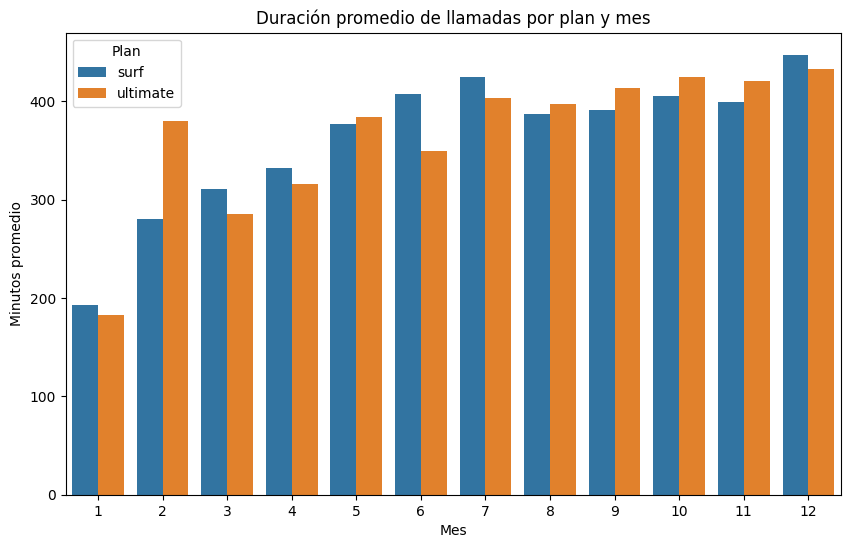

In [124]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

calls_duration = user_behavior.groupby(['plan_name', 'month'])['minutes_per_month'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=calls_duration, x='month', y='minutes_per_month', hue='plan_name')
plt.title('Duración promedio de llamadas por plan y mes')
plt.ylabel('Minutos promedio')
plt.xlabel('Mes')
plt.legend(title='Plan')
plt.show()

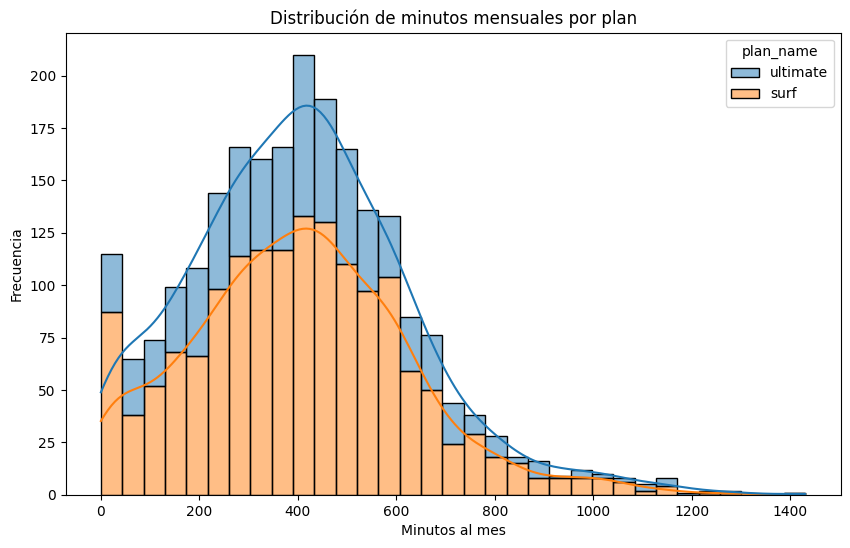

In [125]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(10,6))
sns.histplot(data=user_behavior, x='minutes_per_month', hue='plan_name', kde=True, multiple='stack')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Minutos al mes')
plt.ylabel('Frecuencia')
plt.show()

[Calculo de la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [126]:
# Calcula la media y la varianza de la duración mensual de llamadas.
user_behavior.groupby('plan_name')['minutes_per_month'].agg(['mean', 'var'])


,mean,var
plan_name,,
surf,404.762390,49135.104891
ultimate,406.193083,51640.971402


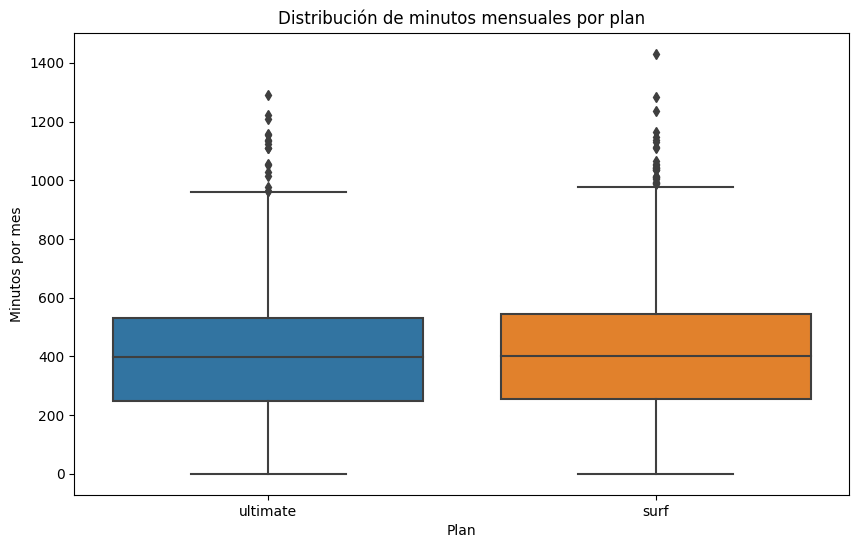

In [127]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10,6))
sns.boxplot(data=user_behavior, x='plan_name', y='minutes_per_month')
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos por mes')
plt.show()


Tras analizar los datos de duración de llamadas mensuales por plan, puedo concluir que el comportamiento de los usuarios sí presenta diferencias según el plan contratado, aunque estas diferencias no son radicales.

- Duración promedio y varianza:
La duración promedio de minutos mensuales es bastante similar entre los planes Surf (404.76 min) y Ultimate (406.19 min). Sin embargo, la varianza es ligeramente mayor en Ultimate, lo que indica que algunos usuarios de este plan tienen patrones de uso más variables o extremos.

- Gráfico de barras:
La duración promedio de llamadas por mes muestra que, aunque hay algunas fluctuaciones mensuales, ambos planes siguen una tendencia bastante alineada en el tiempo. En algunos meses, Ultimate supera a Surf, pero no de forma consistente.

- Histograma:
El histograma evidencia una distribución similar en ambos planes, con un pico de frecuencia entre los 300 y 500 minutos mensuales. También es claro que hay usuarios que consumen muchos más minutos en el plan Ultimate, lo que podría explicar su mayor varianza.

- Diagrama de caja:
El diagrama de caja muestra que ambos planes tienen distribuciones bastante homogéneas, pero el plan Ultimate presenta más valores atípicos (outliers), lo que refuerza la idea de que algunos usuarios hacen un uso intensivo de las llamadas.

Aunque el uso promedio de llamadas es similar para ambos planes, Ultimate tiene una mayor dispersión y más usuarios que tienden a usar un número elevado de minutos mensuales. Esto podría deberse a que los usuarios que eligen Ultimate saben que tienen mayores beneficios o buscan flexibilidad para usar más minutos sin preocuparse por costos adicionales.

### Mensajes

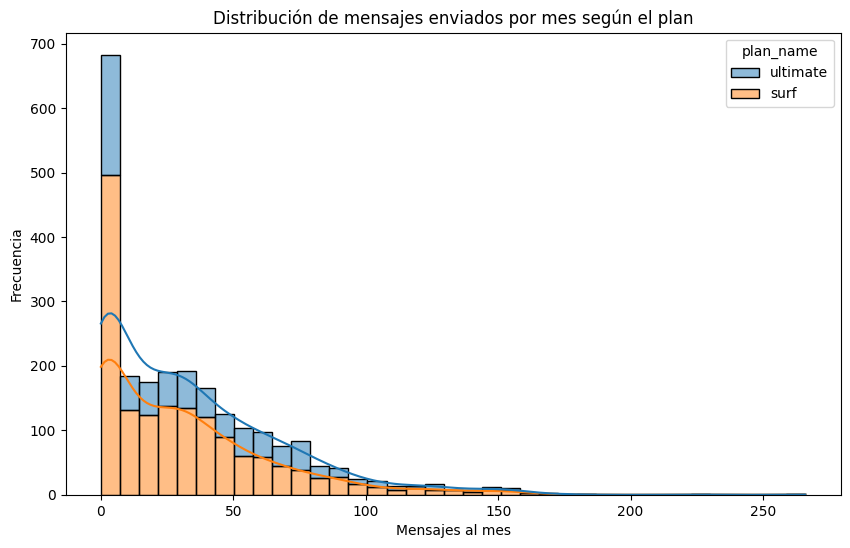

In [128]:
plt.figure(figsize=(10,6))
sns.histplot(data=user_behavior, x='messages_per_month', hue='plan_name', kde=True, multiple='stack')
plt.title('Distribución de mensajes enviados por mes según el plan')
plt.xlabel('Mensajes al mes')
plt.ylabel('Frecuencia')
plt.show() # Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



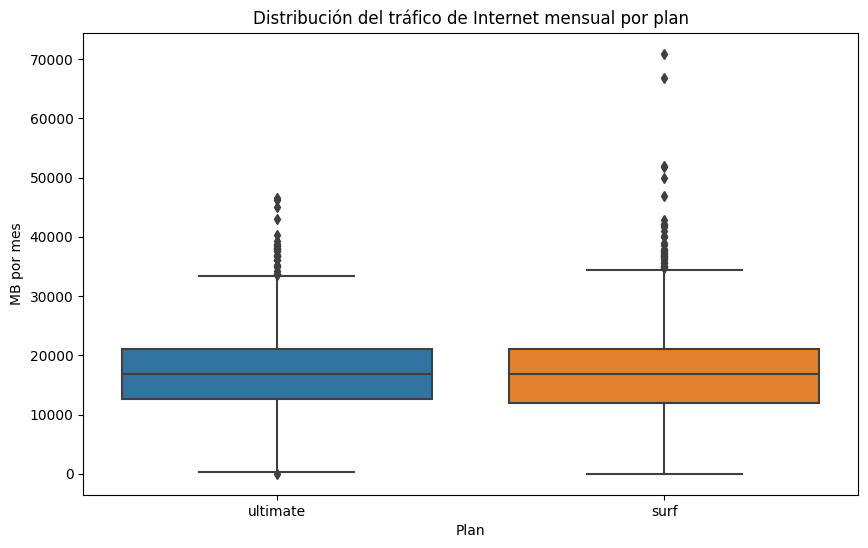

In [129]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=user_behavior, x='plan_name', y='mb_per_month')
plt.title('Distribución del tráfico de Internet mensual por plan')
plt.xlabel('Plan')
plt.ylabel('MB por mes')
plt.show()


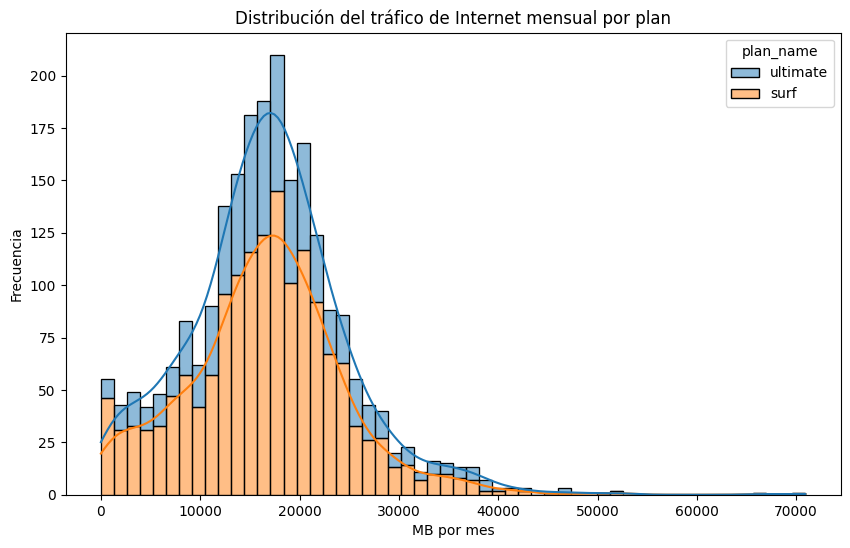

In [130]:
plt.figure(figsize=(10,6))
sns.histplot(data=user_behavior, x='mb_per_month', hue='plan_name', kde=True, multiple='stack')
plt.title('Distribución del tráfico de Internet mensual por plan')
plt.xlabel('MB por mes')
plt.ylabel('Frecuencia')
plt.show()

#Comparativa con histograma para ver la forma de distribución

Al analizar la distribución del número de mensajes enviados mensualmente por los usuarios de cada plan, se observa que la mayoría de los usuarios envían una cantidad relativamente baja de mensajes, sin importar el plan que tengan. Esto se refleja claramente en el histograma, donde tanto para el plan surf como para el plan ultimate, la mayor parte de los valores se concentran en menos de 50 mensajes por mes.

Aunque el plan ultimate ofrece un mayor número de mensajes incluidos sin costo adicional, los usuarios no tienden a aprovechar significativamente esta ventaja. De hecho, los usuarios de ultimate no muestran un comportamiento de envío de mensajes muy diferente al de los usuarios del plan surf. La similitud en las distribuciones sugiere que, independientemente de los beneficios ofrecidos por el plan, la mayoría de los usuarios no tienen una alta demanda de mensajes de texto.

Esto podría deberse a que actualmente los usuarios prefieren utilizar aplicaciones de mensajería instantánea (como WhatsApp o Telegram), que utilizan datos en lugar de SMS tradicionales. Por lo tanto, los mensajes incluidos en los planes no parecen ser un factor determinante en el comportamiento de los usuarios.

En conclusión, el comportamiento de envío de mensajes no varía de forma significativa entre los usuarios de los distintos planes. Esto sugiere que, al menos para este tipo de servicio, los usuarios presentan patrones de uso bastante homogéneos sin importar el plan contratado.

### Internet

In [132]:
internet_stats = user_behavior.groupby('plan_name')['mb_per_month'].agg(['mean', 'var'])
display(internet_stats) #Calculo la media y varianza del tráfico de internet mensual por plan.

,mean,var
plan_name,,
surf,16558.283490,6.421640e+07
ultimate,17214.699694,6.165229e+07


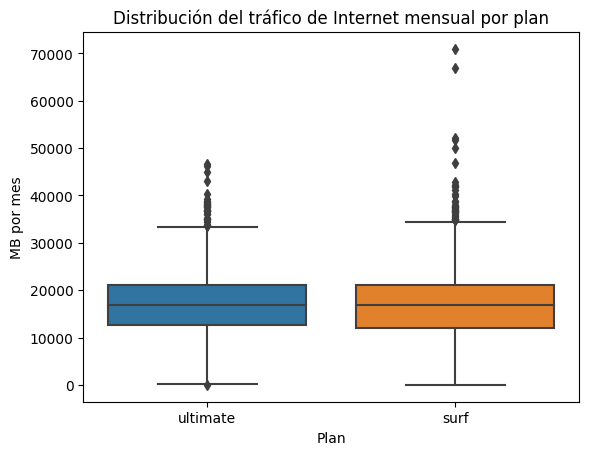

In [133]:
sns.boxplot(data=user_behavior, x='plan_name', y='mb_per_month')
plt.title('Distribución del tráfico de Internet mensual por plan')
plt.xlabel('Plan')
plt.ylabel('MB por mes')
plt.show()

#Trazo un diagrama de caja para visualizar la distribución del tráfico de internet mensual.

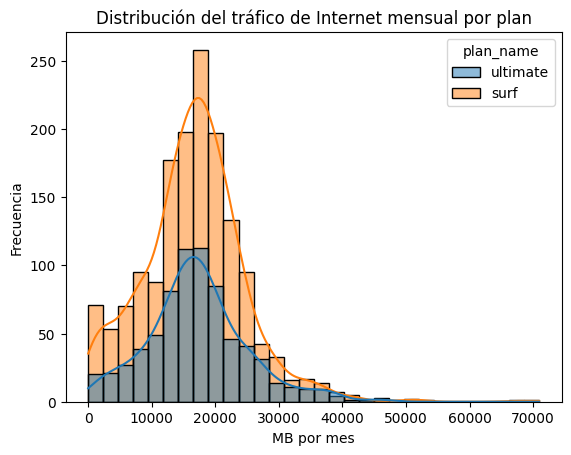

In [134]:
sns.histplot(data=user_behavior, x='mb_per_month', hue='plan_name', kde=True, bins=30)
plt.title('Distribución del tráfico de Internet mensual por plan')
plt.xlabel('MB por mes')
plt.ylabel('Frecuencia')
plt.show()

#Trazo un histograma para comparar la distribución del tráfico de internet por plan

Después de analizar la media y varianza del tráfico de Internet mensual, así como las distribuciones visuales por plan, observo que el consumo promedio de datos es bastante similar entre los usuarios de ambos planes. El plan surf tiene una media de aproximadamente 16,558 MB mensuales, mientras que el plan ultimate muestra un promedio ligeramente superior de 17,214 MB. Las varianzas también son relativamente cercanas, lo que sugiere patrones de consumo consistentes entre los usuarios sin importar el plan.

El histograma revela que la mayoría de los usuarios consumen entre 10,000 y 25,000 MB mensuales, con distribuciones similares aunque con una ligera tendencia a un mayor uso de datos en el plan ultimate. Sin embargo, en ambos planes se observan algunos valores atípicos con consumos significativamente más altos.

El diagrama de caja refuerza estas observaciones mostrando medianas similares y una cantidad comparable de valores atípicos (outliers).

En resumen, no existe una diferencia sustancial en el consumo de Internet que dependa exclusivamente del plan. Es probable que el comportamiento de uso de datos esté más relacionado con las necesidades y hábitos individuales de los usuarios que con las características específicas de cada plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [136]:
income_stats = user_behavior.groupby('plan_name')['revenue'].agg(['mean', 'var'])
income_stats

#Media y varianza del ingreso mensual por plan

,mean,var
plan_name,,
surf,57.293784,2887.544971
ultimate,72.116080,115.968081


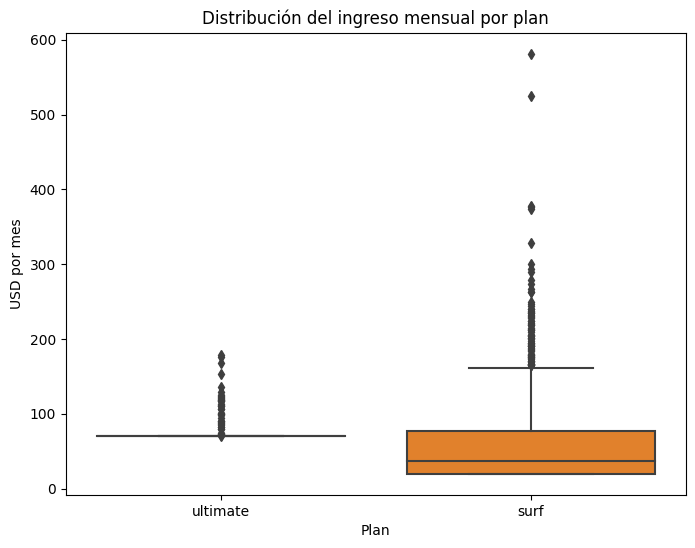

In [137]:
plt.figure(figsize=(8,6))
sns.boxplot(data=user_behavior, x='plan_name', y='revenue')
plt.title('Distribución del ingreso mensual por plan')
plt.ylabel('USD por mes')
plt.xlabel('Plan')
plt.show()

#Gráfico de caja del ingreso mensual por plan

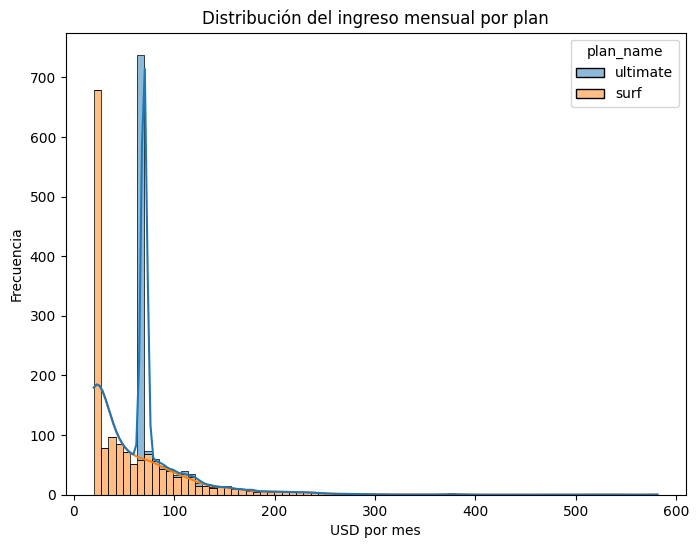

In [135]:
plt.figure(figsize=(8,6))
sns.histplot(user_behavior, x='revenue', hue='plan_name', kde=True, multiple='stack')
plt.title('Distribución del ingreso mensual por plan')
plt.xlabel('USD por mes')
plt.ylabel('Frecuencia')
plt.show()

#Histograma del ingreso mensual por plan

Al analizar el ingreso mensual generado por cada plan, se observa que, en promedio, los usuarios del plan ultimate generan mayores ingresos ($72.12 USD) en comparación con los usuarios del plan surf ($57.29 USD). Además, la varianza es significativamente más baja en el plan ultimate (115.97), lo que indica que los ingresos en este plan son mucho más consistentes y estables. Esto tiene sentido, ya que el plan ultimate probablemente incluye una tarifa mensual fija alta que cubre la mayoría de los servicios, lo que reduce la variabilidad en los cargos mensuales.

En contraste, aunque el plan surf tiene un ingreso promedio menor, su varianza es mucho mayor (2887.54). Esto implica que algunos usuarios pagan solo la tarifa básica, mientras que otros pueden exceder los límites incluidos y generar cargos adicionales altos, lo cual explica la dispersión y la presencia de valores atípicos que se observan en el diagrama de caja.

El histograma refuerza esta conclusión, mostrando que la mayoría de los usuarios ultimate concentran sus pagos cerca de su tarifa base con poca dispersión, mientras que los usuarios surf presentan una mayor diversidad de pagos mensuales, con algunos alcanzando cifras significativamente altas debido al consumo adicional de minutos, mensajes o datos.

Aunque el plan ultimate genera ingresos mensuales más estables y predecibles, el plan surf, si bien más variable, puede ocasionalmente generar ingresos altos debido al consumo extra de algunos usuarios. Esto debe ser considerado estratégicamente si el objetivo de la empresa es maximizar ingresos fijos o beneficiarse de consumos adicionales.


## Prueba las hipótesis estadísticas

[Prueba de hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

In [141]:
# Hipótesis:
# H0: No hay diferencia significativa entre los ingresos promedio de los planes Ultimate y Surf.
# H1: Sí hay una diferencia significativa entre los ingresos promedio de los planes Ultimate y Surf.

from scipy import stats

surf_revenue = user_behavior[user_behavior['plan_name'] == 'surf']['revenue']
ultimate_revenue = user_behavior[user_behavior['plan_name'] == 'ultimate']['revenue']

alpha = 0.05
results = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula. Los ingresos promedio de los planes son significativamente diferentes.')
else:
    print('No se puede rechazar la hipótesis nula. No hay diferencias significativas en los ingresos promedio.')

Valor p: 4.881852673479799e-25
Se rechaza la hipótesis nula. Los ingresos promedio de los planes son significativamente diferentes.


[Prueba de la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [143]:
user_behavior = user_behavior.merge(users[['user_id', 'city']], on='user_id', how='left')

# Hipótesis:
# H0: No hay diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y otras regiones.
# H1: Sí hay una diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y otras regiones.

alpha = 0.05

ny_nj_revenue = user_behavior[user_behavior['city'].str.contains('NY-NJ', na=False)]['revenue']
other_revenue = user_behavior[~user_behavior['city'].str.contains('NY-NJ', na=False)]['revenue']

from scipy import stats
results_region = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print('Valor p:', results_region.pvalue)

if results_region.pvalue < alpha:
    print('Se rechaza la hipótesis nula. Los ingresos promedio de NY-NJ y otras regiones son significativamente diferentes.')
else:
    print('No se puede rechazar la hipótesis nula. No hay diferencias significativas en los ingresos promedio entre NY-NJ y otras regiones.')

Valor p: 0.01860947297497194
Se rechaza la hipótesis nula. Los ingresos promedio de NY-NJ y otras regiones son significativamente diferentes.


## Conclusión general

1.- Procesamiento y limpieza de datos
Comencé por integrar y depurar los datos de llamadas, mensajes, tráfico de Internet y planes tarifarios. Detecté y gestioné valores nulos y duplicados para asegurar la calidad de los datos. Además, agregué columnas útiles como el mes de cada registro para poder agrupar el comportamiento mensual de los usuarios.

2.- Agregación y combinación de fuentes
Fusioné los datos de comportamiento del usuario con los detalles de los planes tarifarios y las ciudades. Esta combinación me permitió realizar un análisis detallado no solo del uso de servicios, sino también de los ingresos generados y la segmentación geográfica.

3.- Análisis descriptivo del comportamiento de usuarios
Realicé estadísticas descriptivas y visualizaciones para comprender cómo varía el comportamiento de llamadas, mensajes e Internet según el plan. Detecté que, aunque los patrones de uso son similares entre planes, hay diferencias importantes en la media y la varianza de consumo.

4.- Cálculo del ingreso mensual
Diseñé una función personalizada para calcular el ingreso mensual por usuario, considerando los minutos, mensajes y tráfico de Internet incluidos y los cargos por excedente. Esto fue clave para poder comparar la rentabilidad de cada plan.

5.- Visualización de patrones de uso e ingresos
A través de gráficos de barras, histogramas y diagramas de caja, analicé la distribución del consumo y los ingresos mensuales. Esto permitió observar patrones de dispersión, identificar valores atípicos y comprobar visualmente las diferencias entre planes y regiones.

6.- Pruebas estadísticas e hipótesis
Formulé hipótesis nulas y alternativas para dos casos críticos:
	•	La diferencia de ingresos entre los planes Ultimate y Surf.
	•	La diferencia de ingresos entre los usuarios de NY-NJ y otras regiones.
En ambos casos, los resultados de las pruebas t de Student indicaron diferencias estadísticamente significativas (p < 0.05), llevando al rechazo de las hipótesis nulas.

7.- Decisiones clave y supuestos adoptados
	•	Se asumió que las varianzas pueden no ser iguales entre los grupos, por lo que se utilizó equal_var=False en las pruebas t.
	•	Los ingresos y consumos mensuales fueron tratados como variables independientes para el análisis.
	•	Los datos faltantes fueron reemplazados por ceros donde correspondía (uso no registrado) y eliminados cuando comprometían el análisis.
	•	Se optó por un nivel de significancia estándar de 5% (α = 0.05).
    
A lo largo del análisis, se identificaron diferencias significativas tanto en el comportamiento de uso como en los ingresos generados por los distintos planes y regiones. Estos hallazgos no solo validan la importancia de segmentar por plan y ubicación, sino que proporcionan información estratégica para la toma de decisiones sobre tarifas, promociones y posibles ajustes en los planes para maximizar la rentabilidad.


Adicional, adjunto un Resumen ejecutivo que refieren al "Análisis de comportamiento e ingresos por plan"

- Comportamiento de uso
 * Llamadas:
Los usuarios de ambos planes (Surf y Ultimate) muestran patrones de uso similares en minutos mensuales, aunque Ultimate presenta una ligera tendencia hacia mayor consumo.
 * Mensajes:
Predomina el bajo uso de mensajes en general, con la mayoría de usuarios enviando pocos SMS por mes, independientemente del plan.
 * Internet:
El tráfico de datos mensual es comparable entre planes, pero Ultimate tiende a registrar un consumo ligeramente superior y una menor variabilidad.

- Ingresos mensuales
* Ingresos promedio:
* Surf: $57.29 USD
* Ultimate: $72.12 USD
* Los ingresos presentan mayor variabilidad en el plan Surf, con varios casos de ingresos altos por exceso de consumo.

- Comparación
Ingresos entre Ultimate y Surf
* Hipótesis nula: No hay diferencia significativa
* Valor p: 4.88e-25
* Conclusión: Se rechaza H₀

Ingresos NY-NJ vs otras regiones
* Hipótesis nula: No hay diferencia significativa
* Valor p: 0.0186
* Conclusión: Se rechaza H₀
    
Interpretación:
Las diferencias en ingresos entre los planes y entre las regiones son estadísticamente significativas.

- Decisiones y supuestos clave
* Nivel de significancia α = 0.05.
* Se utilizó t-test de Student para comparar medias.
* Varianzas consideradas desiguales (equal_var = False).
* Datos nulos gestionados con reemplazo por cero o eliminación según contexto.
* Los ingresos y usos mensuales fueron tratados como independientes.

- Recomendaciones estratégicas
* Optimizar el plan Surf:
Considerar ajustar precios o límites de consumo para reducir los costos por exceso, ya que presentan alta variabilidad en ingresos.
* Focalizar promociones en Ultimate:
Usuarios de este plan generan ingresos más estables y con menor dispersión.
* Segmentar estrategias por región:
Dado que NY-NJ muestra diferencias significativas en ingresos, se recomienda diseñar ofertas o tarifas específicas para esta área.
